<a href="https://colab.research.google.com/github/RemnantArgon001/Project2/blob/main/Project_2_Part_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


Second choice: Fuel consumption 

1) Source of data https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings

2) Brief description of data:Dataset provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada in 2022.

3) What is the target? Fuel Consumption(Comb (mpg)

4) Is this a classification or regression problem? Regression

5) How many features?15

6) How many rows of data.946

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset? having to ensure of no leakage lots of values to classify as well as ohe

In [ ]:
df=pd.read_csv('/MY2022 Fuel Consumption Ratings.csv')

In [ ]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [ ]:
df.shape

(946, 15)

Out of the two data sets I have provided I was allowed to select either one of them. 
I have chosen to go with my second choice Fuel Consumption. 


In [ ]:
#Deleating unessisary columns
#first I will take a deeper dive into my data looking at columns that would not be needed as they provide no real value in determining fuel consumption. 

In [ ]:
from pandas.core.algorithms import value_counts

In [ ]:
df['Model Year'].value_counts()

2022    946
Name: Model Year, dtype: int64

In [ ]:
#Converting L/100km to US MPG (approx) code is now # out as I do not want it continuously mutilplying these colums as I go further in my code. 

In [ ]:
from numpy.ma.core import multiply 
#(commented out because when running multiple times it will continue to multiply)
#df[['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))']] = (df[['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))']] * 2.352145)

In [ ]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,23.286236,16.465015,20.228447,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,29.637027,22.110163,26.344024,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,25.873595,20.228447,23.286236,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,26.579239,21.404519,24.227094,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,26.344024,18.817160,23.051021,29,230,5,7


In [ ]:
# we have confirmed that the entire data set only has cars from the year 2022 this column can be dropped. as well as model.
df.drop(labels=['Model Year','Fuel Consumption(Comb (L/100 km))','Model'],axis=1, inplace=True)

In [ ]:
#confirm column is dropped from data frame.
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,23.286236,16.465015,33,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,29.637027,22.110163,25,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,25.873595,20.228447,29,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,26.579239,21.404519,27,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,26.344024,18.817160,29,230,5,7


In [ ]:
# I am chosing to keep the rest of my data 

In [ ]:
# checking for dupicate values in my data set. 

In [ ]:
df.duplicated().value_counts()

False    843
True     103
dtype: int64

In [ ]:
# Duplicated is by  product of taking away model identifier I am keeping the duplicates as if make = vehicle class predict target with parameters added features such as cylinders fuel type and transmission even emissions collumns can be used model is too unique and could blur data. 

In [ ]:
# check for missing values in data set. 


In [ ]:
df.isna().sum()

Make                                 0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [ ]:
#Identify and correct any inconsistencies in data for categorical values (i.e. Cat, cat, cats)
# will divide the Fuel Consumption(Comb (mpg)) colum by 1.02 to got unit into U.S mpg as it currently is in imperial 

In [ ]:
# (commented out because if i need to rerun code I do not want it to do it more than once)
#df['Fuel Consumption(Comb (mpg))'] = (df['Fuel Consumption(Comb (mpg))'] / 1.02)

In [ ]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,23.286236,16.465015,32.352941,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,29.637027,22.110163,24.509804,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,25.873595,20.228447,28.431373,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,26.579239,21.404519,26.470588,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,26.344024,18.817160,28.431373,230,5,7


In [ ]:
#Renaming columns to account for conversions to U.S. MPG

In [ ]:
df.rename(columns = {'Fuel Consumption(Comb (mpg))':'U.S.Combinded MPG'}, inplace = True)

In [ ]:
df.rename(columns = {'Fuel Consumption (City (L/100 km)':'U.S. City MPG'}, inplace = True)

In [ ]:
df.rename(columns = {'Fuel Consumption(Hwy (L/100 km))':'U.S. Hwy MPG'}, inplace = True)

In [ ]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,U.S. City MPG,U.S. Hwy MPG,U.S.Combinded MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,23.286236,16.465015,32.352941,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,29.637027,22.110163,24.509804,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,25.873595,20.228447,28.431373,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,26.579239,21.404519,26.470588,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,26.344024,18.817160,28.431373,230,5,7


In [ ]:
# lots of excess places after decimal point going to round the the column

In [ ]:
df['U.S. Hwy MPG'] = df['U.S. Hwy MPG'].round(0)

In [ ]:
df['U.S. Hwy MPG'] = df['U.S. Hwy MPG'].apply(int)

In [ ]:
df['U.S.Combinded MPG'] = df['U.S.Combinded MPG'].round(0)

In [ ]:
df['U.S.Combinded MPG'] = df['U.S.Combinded MPG'].apply(int)

In [ ]:
df['U.S. City MPG'] = df['U.S. City MPG'].round(0)

In [ ]:
df['U.S. City MPG'] = df['U.S. City MPG'].apply(int)

In [ ]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,U.S. City MPG,U.S. Hwy MPG,U.S.Combinded MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,23,16,32,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,30,22,25,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,26,20,28,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,27,21,26,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,26,19,28,230,5,7


In [ ]:
df.dtypes

Make                    object
Vehicle Class           object
Engine Size(L)         float64
Cylinders                int64
Transmission            object
Fuel Type               object
U.S. City MPG            int64
U.S. Hwy MPG             int64
U.S.Combinded MPG        int64
CO2 Emissions(g/km)      int64
CO2 Rating               int64
Smog Rating              int64
dtype: object

In [ ]:
import seaborn as sns
from matplotlib import rcParams

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})

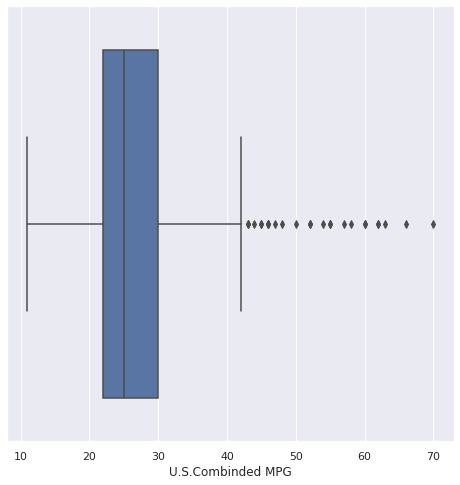

In [ ]:
ax = sns.boxplot(x=df["U.S.Combinded MPG"])

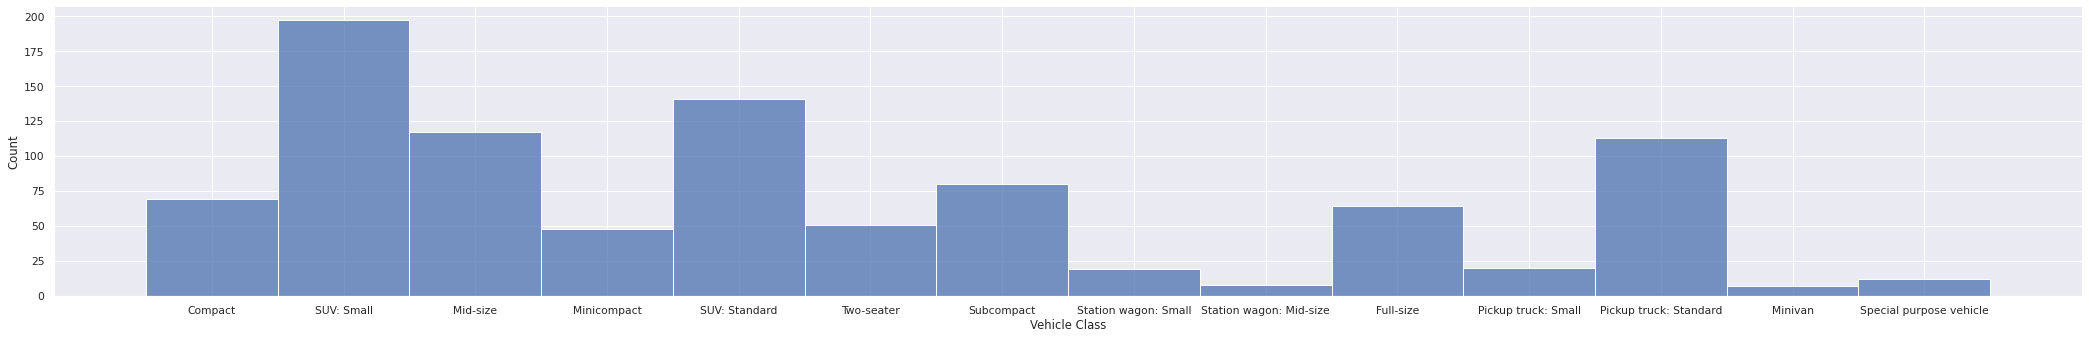

In [ ]:
p = sns.displot(data=df, x='Vehicle Class', height=5, aspect=6.0)
p.fig.set_dpi(70)

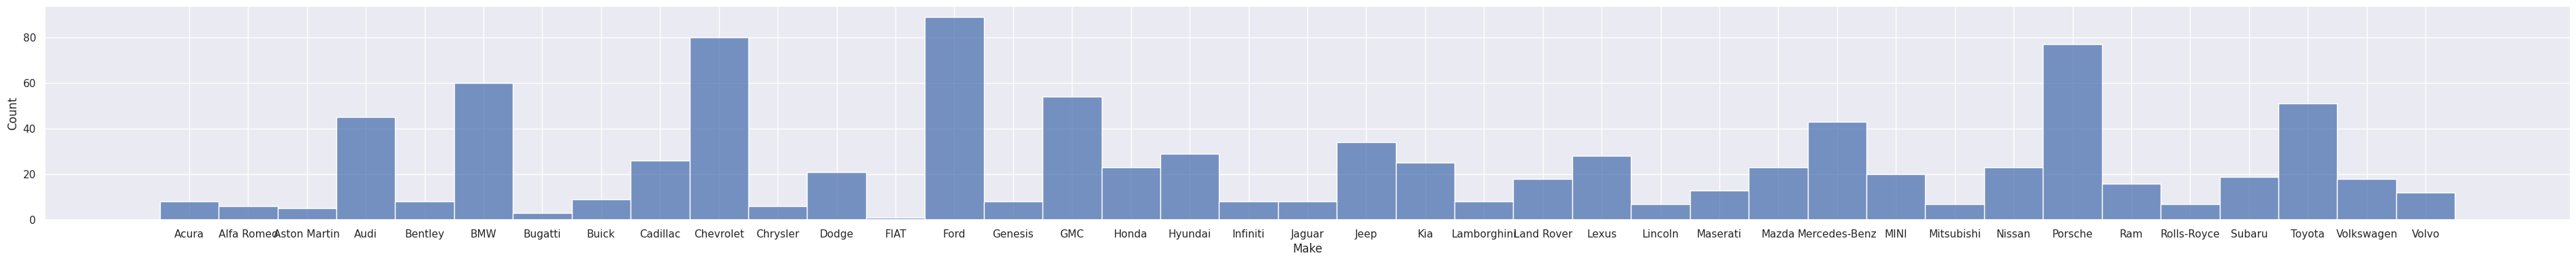

In [ ]:
p = sns.displot(data=df, x='Make', height=4, aspect=9.5)
p.fig.set_dpi(100)

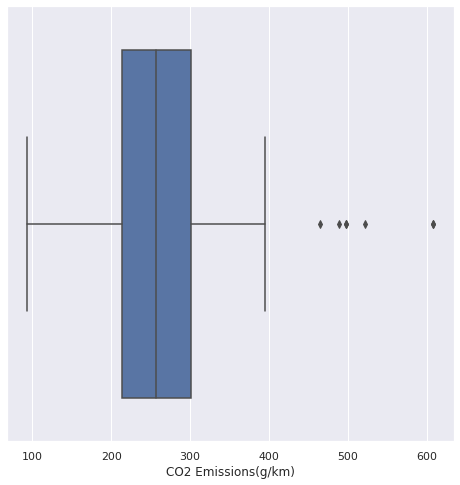

In [ ]:
ax = sns.boxplot(x=df["CO2 Emissions(g/km)"])

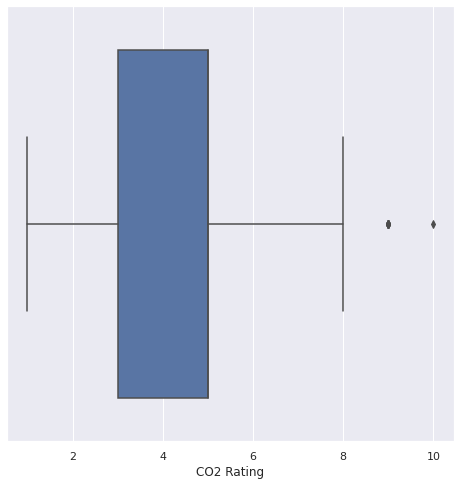

In [ ]:
ax = sns.boxplot(x=df["CO2 Rating"])

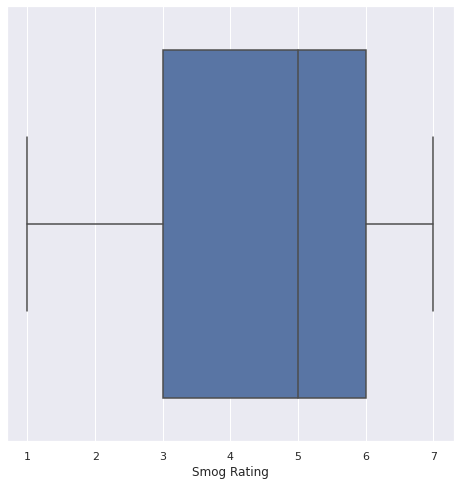

In [ ]:
ax = sns.boxplot(x=df["Smog Rating"])

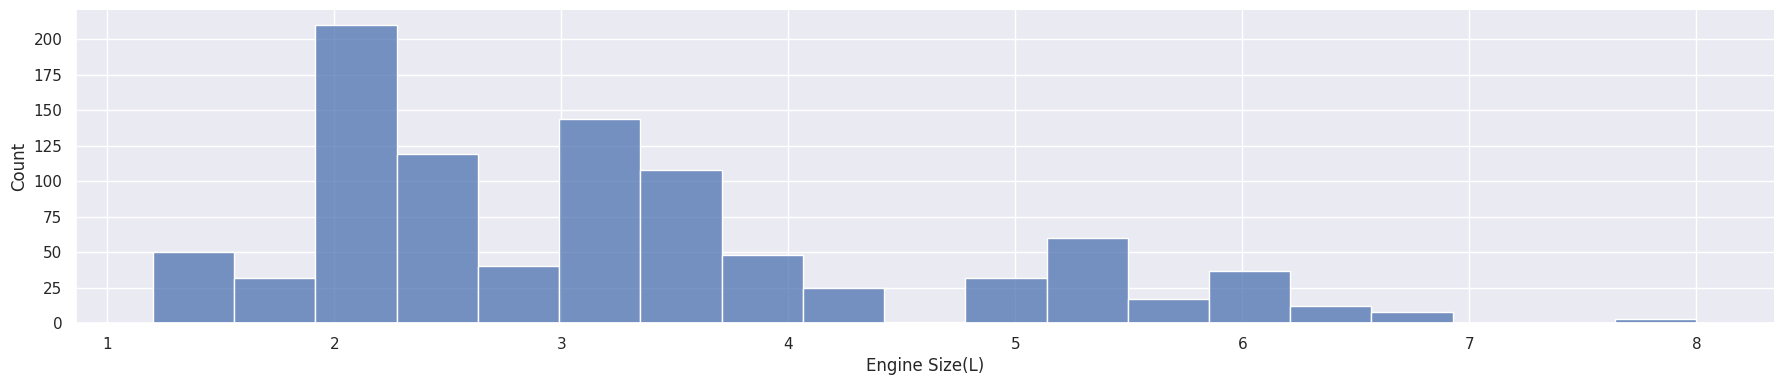

In [ ]:

p = sns.displot(data=df, x='Engine Size(L)', height=4, aspect=4.5)
p.fig.set_dpi(100)

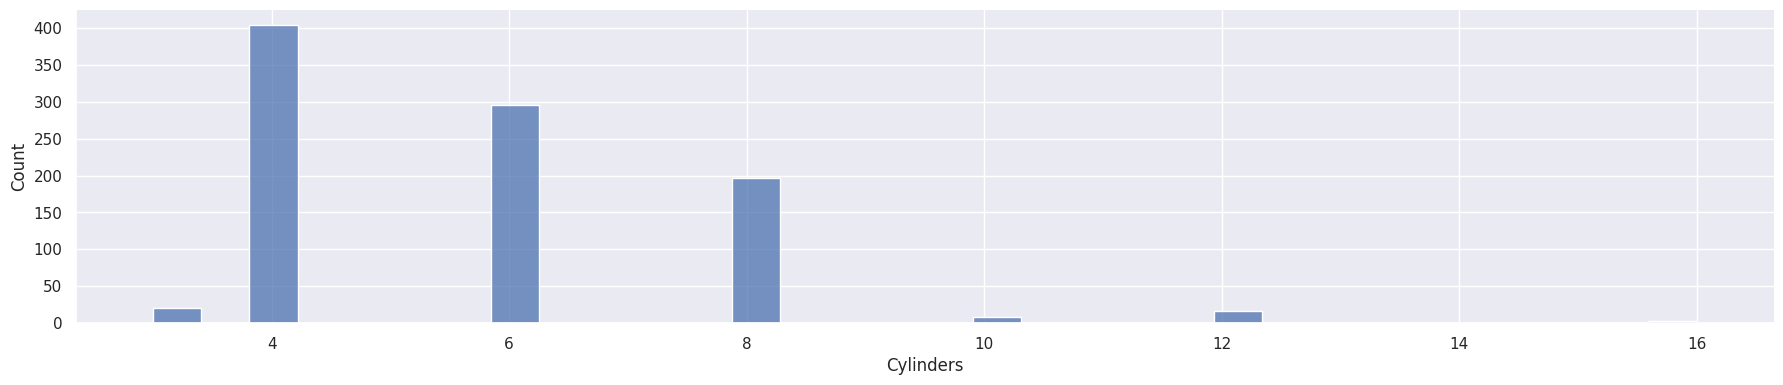

In [ ]:
p = sns.displot(data=df, x='Cylinders', height=4, aspect=4.5)
p.fig.set_dpi(100)

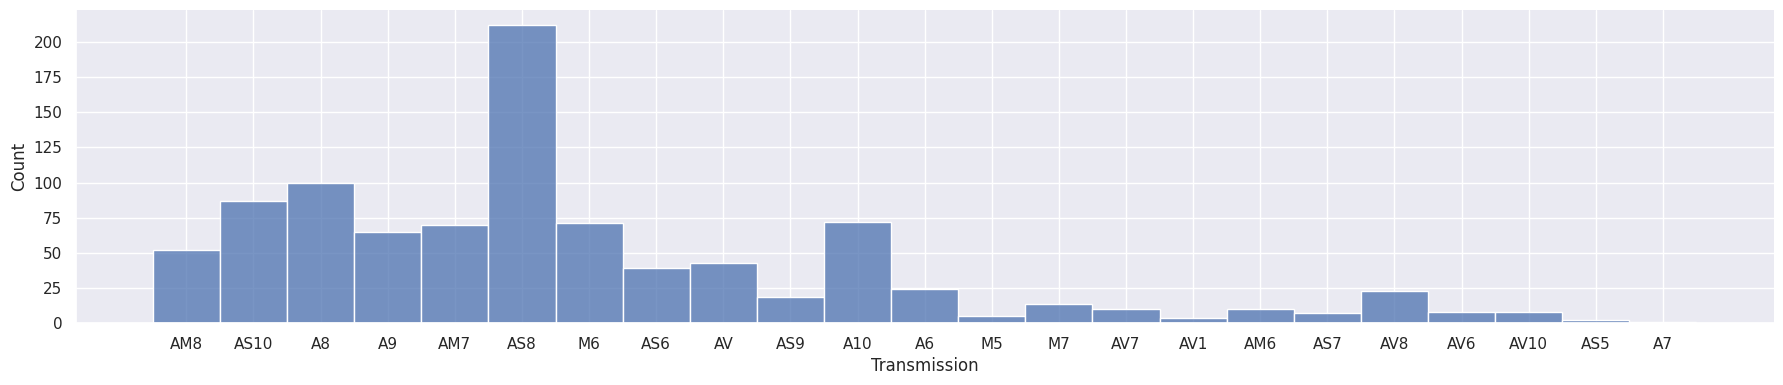

In [ ]:
p = sns.displot(data=df, x='Transmission', height=4, aspect=4.5)
p.fig.set_dpi(100)

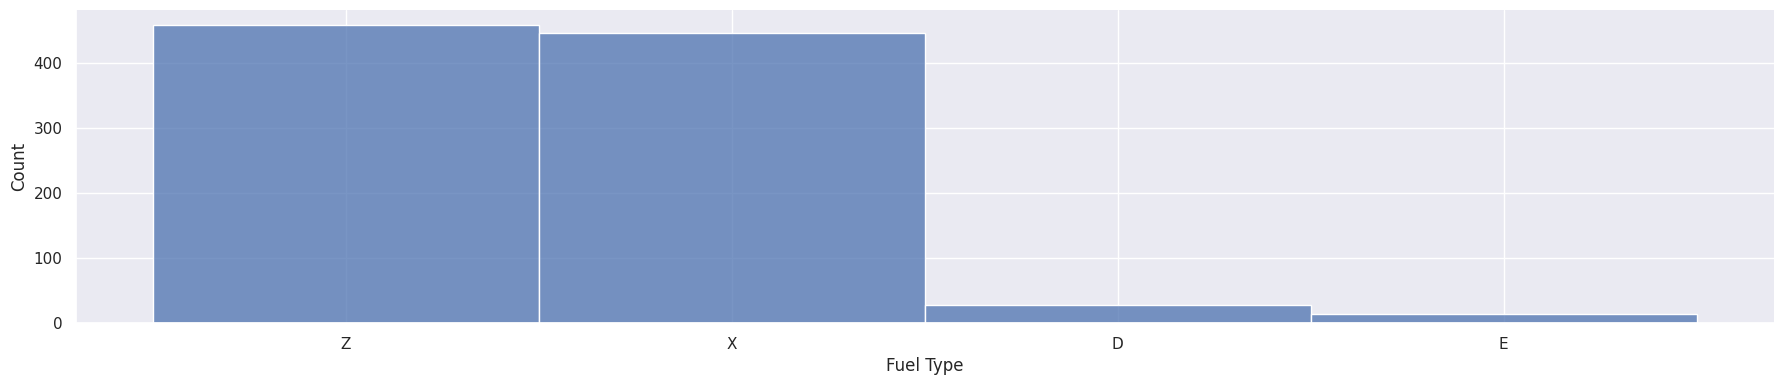

In [ ]:
p = sns.displot(data=df, x='Fuel Type', height=4, aspect=4.5)
p.fig.set_dpi(100)

In [ ]:
# produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

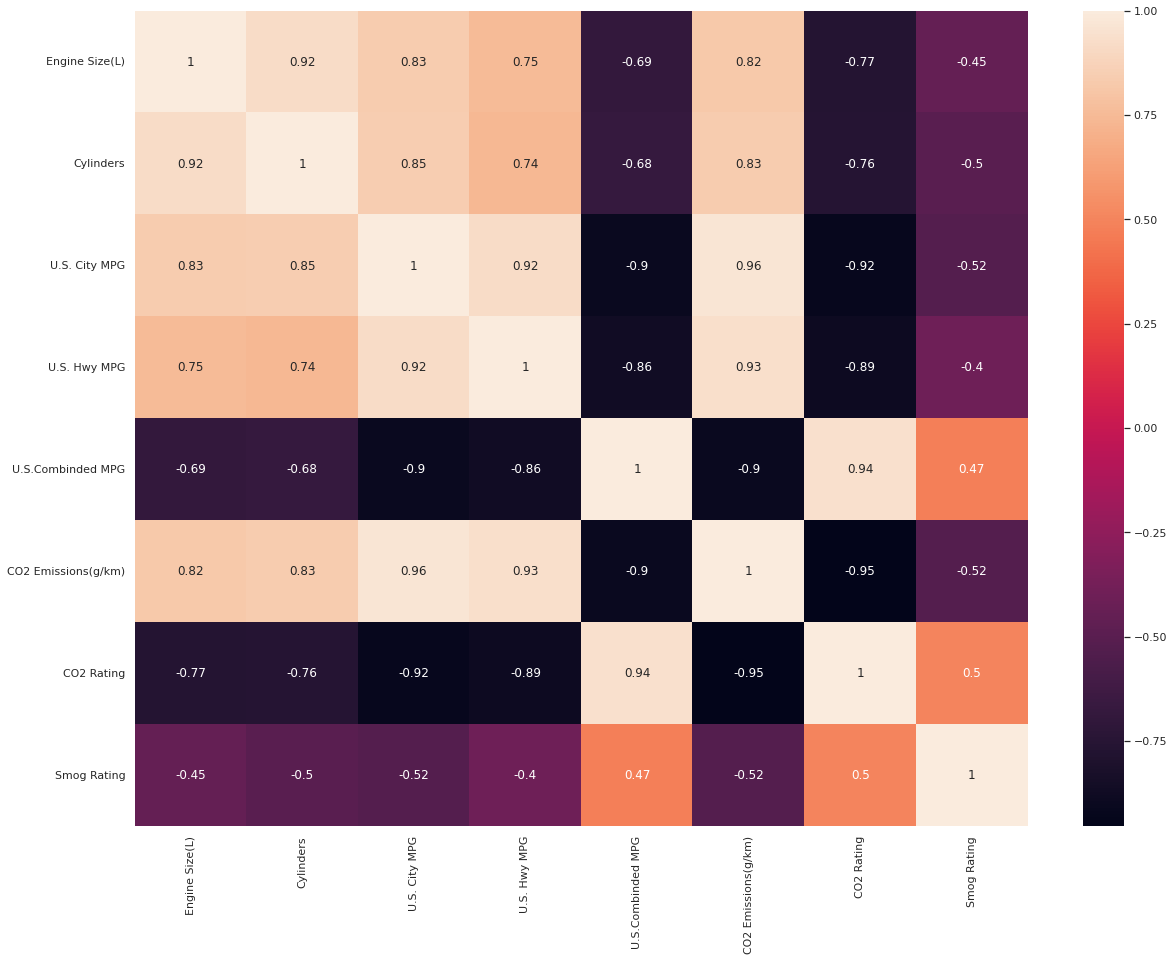

In [ ]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corr, annot = True);

In [ ]:
 # US Combined Has High Positive Correlation in only CO2 Rating and a Moderate Positive Correlation with Smog Rating. The Negetive Correlations are Statistically drasticly strong In all other catagories. 

In [ ]:
# Part #4 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,U.S. City MPG,U.S. Hwy MPG,U.S.Combinded MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,23,16,32,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,30,22,25,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,26,20,28,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,27,21,26,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,26,19,28,230,5,7


In [ ]:
X = df.drop(columns='U.S.Combinded MPG')
y = df['U.S.Combinded MPG']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# create one-hot encode the categorical columns (zipcode) and scale the numeric columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()


# Use 2 tuples, one for numeric and one for categorical
ohe_tuple = (ohe, cat_selector)
scaler_tuple = (scaler, num_selector)

# Combine the pipelines in a ColumnTransformer with the appropriate column selectors
transformer = make_column_transformer(scaler_tuple, ohe_tuple, remainder='passthrough')

In [ ]:
# instantiate a baseline model using the 'mean' strategy
dummy = DummyRegressor(strategy='mean')
# put your ColumnTransformer and the baseline model into a pipeline
base_pipe = make_pipeline(transformer, dummy)

# fit your pipe onto the training data
base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d5b0b0b10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d5b0b0cd0>)])),
                ('dummyregressor', DummyRegressor())])

In [ ]:
# define a function that takes true and predicted values as arguments

def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f} ')


# and prints all 4 metrics

In [ ]:
# find MAE, MSE, RMSE and R2 on the baseline model for both the train and test data
print('Train Evaluation')

eval_model(y_train, base_pipe.predict(X_train))

print('\n Test Evaluation')

eval_model(y_train, base_pipe.predict(X_train))

Train Evaluation
MAE: 5.36 
 MSE: 53.35 
 RMSE: 7.30 
 R2: 0.00 

 Test Evaluation
MAE: 5.36 
 MSE: 53.35 
 RMSE: 7.30 
 R2: 0.00 


In [ ]:
lin_reg = make_pipeline(transformer, LinearRegression())

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d5b0b0b10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d5b0b0cd0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
print('Train Evaluation')

eval_model(y_train, lin_reg.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, lin_reg.predict(X_test))

Train Evaluation
MAE: 0.97 
 MSE: 2.11 
 RMSE: 1.45 
 R2: 0.96 

 Test Evaluation
MAE: 4,487,818,395.61 
 MSE: 1,591,100,601,364,185,874,432.00 
 RMSE: 39,888,602,399.23 
 R2: -29,164,710,184,720,146,432.00 


In [ ]:
# from data return on the r2 score train set is extreamly over fit while the test r2 getting a negetive this model is simply not appropriate for the data set. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df.dtypes

Engine Size(L)         float64
Cylinders                int64
U.S. City MPG            int64
U.S. Hwy MPG             int64
U.S.Combinded MPG        int64
CO2 Emissions(g/km)      int64
CO2 Rating               int64
Smog Rating              int64
dtype: object

In [ ]:
df = df[['Engine Size(L)', 'Cylinders','U.S. City MPG', 'U.S. Hwy MPG','U.S.Combinded MPG', 'CO2 Emissions(g/km)','CO2 Rating', 'Smog Rating']]

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

In [ ]:
inertias = []

In [ ]:
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

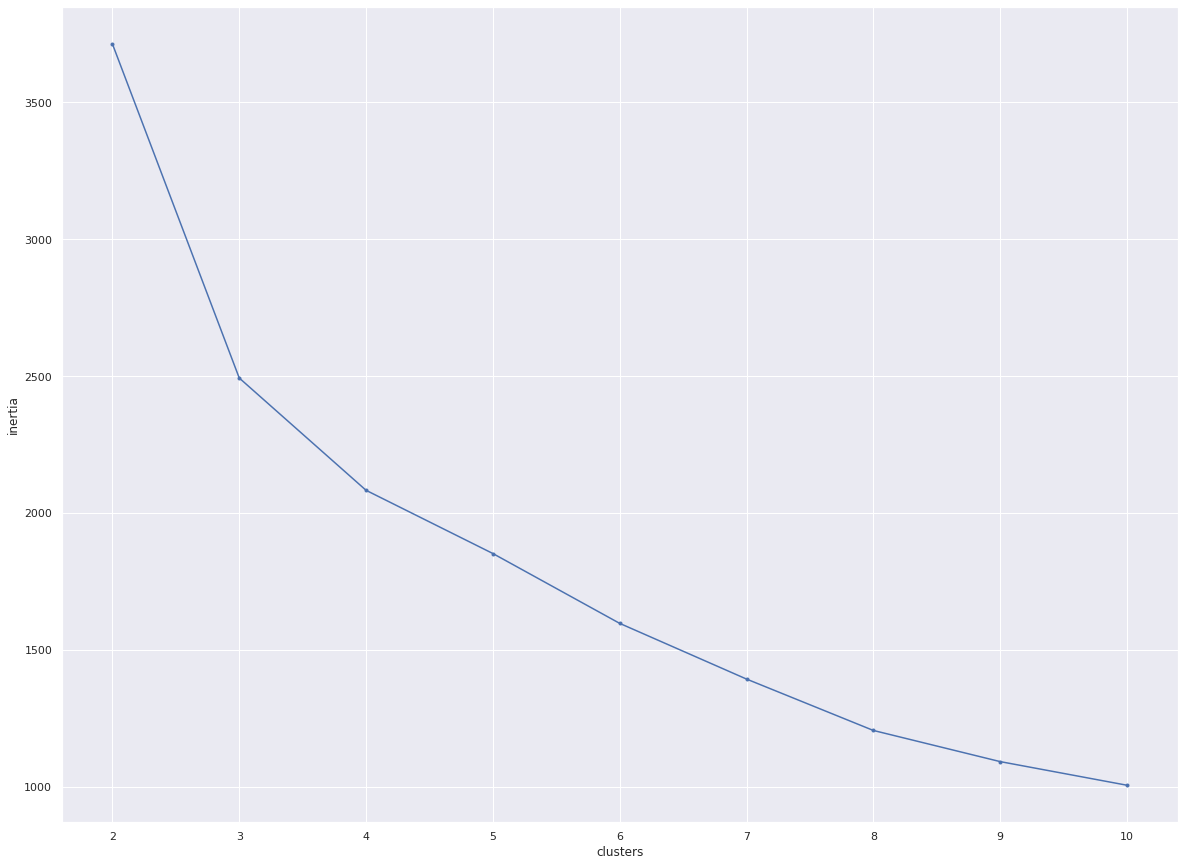

In [ ]:
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

In [ ]:
silhouette_scores = []

In [ ]:
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

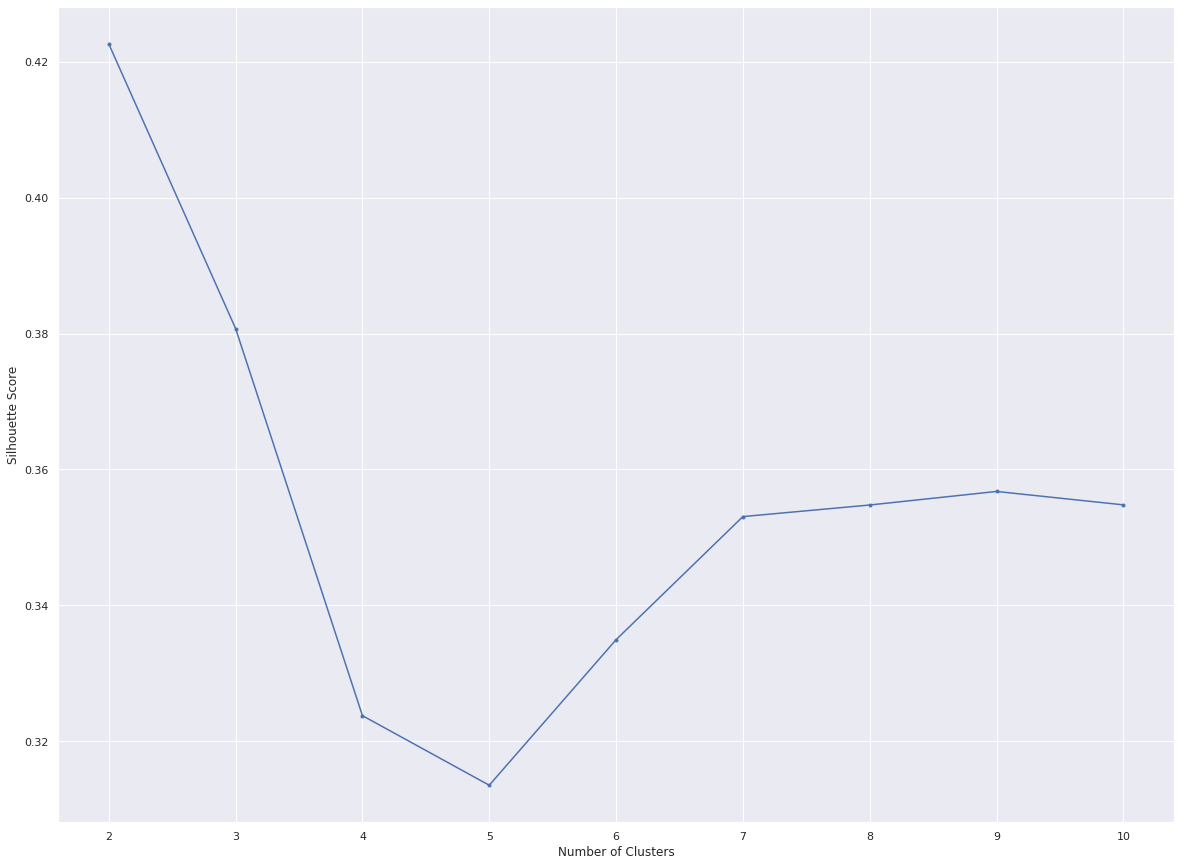

In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Engine Size(L),Cylinders,U.S. City MPG,U.S. Hwy MPG,U.S.Combinded MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,-0.581281,-0.863551,-0.790866,-1.123766,0.721016,-0.918695,0.993111,-1.161627
1,0.219250,0.171835,0.069228,-0.008839,-0.234662,0.059428,-0.366488,0.029592
2,-0.872384,-0.863551,-0.422254,-0.380482,0.174914,-0.421871,0.313312,0.625201
3,-0.872384,-0.863551,-0.299383,-0.194660,-0.098137,-0.266613,0.313312,0.625201
4,-0.872384,-0.863551,-0.422254,-0.566303,0.174914,-0.452922,0.313312,1.220810


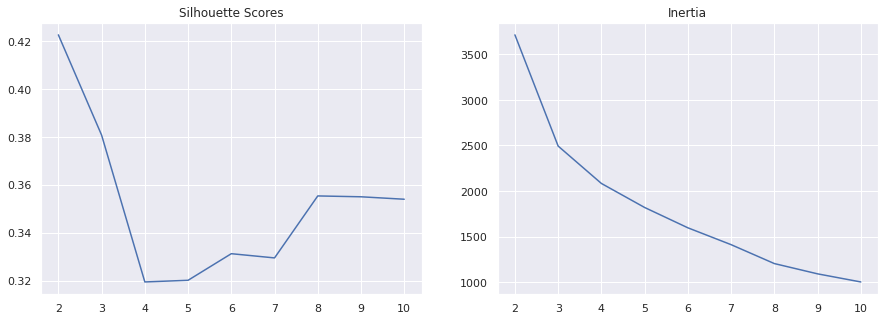

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertia and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
# Refit KMeans with 2 clusters Highest silhoutte Score
kmeans= KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df['cluster'] =kmeans.labels_
df.head()

,Engine Size(L),Cylinders,U.S. City MPG,U.S. Hwy MPG,U.S.Combinded MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating,cluster
0,2.4,4,23,16,32,200,6,3,1
1,3.5,6,30,22,25,263,4,5,0
2,2.0,4,26,20,28,232,5,6,1
3,2.0,4,27,21,26,242,5,6,1
4,2.0,4,26,19,28,230,5,7,1


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Engine Size(L),Cylinders,U.S. City MPG,U.S. Hwy MPG,U.S.Combinded MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0,4.256347,7.175947,35.926503,26.276169,21.420935,312.280624,3.327394,4.251670
1,1,2.243260,4.305835,23.573441,18.227364,31.505030,211.193159,5.633803,5.581489


In [ ]:
cluster_groups.describe()

,cluster,Engine Size(L),Cylinders,U.S. City MPG,U.S. Hwy MPG,U.S.Combinded MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.500000,3.249803,5.740891,29.749972,22.251767,26.462983,261.736891,4.480599,4.916580
std,0.707107,1.423468,2.029475,8.734934,5.691365,7.130532,71.479632,1.630877,0.940324
min,0.000000,2.243260,4.305835,23.573441,18.227364,21.420935,211.193159,3.327394,4.251670
25%,0.250000,2.746532,5.023363,26.661706,20.239565,23.941959,236.465025,3.903996,4.584125
50%,0.500000,3.249803,5.740891,29.749972,22.251767,26.462983,261.736891,4.480599,4.916580
75%,0.750000,3.753075,6.458419,32.838238,24.263968,28.984006,287.008757,5.057201,5.249034
max,1.000000,4.256347,7.175947,35.926503,26.276169,31.505030,312.280624,5.633803,5.581489


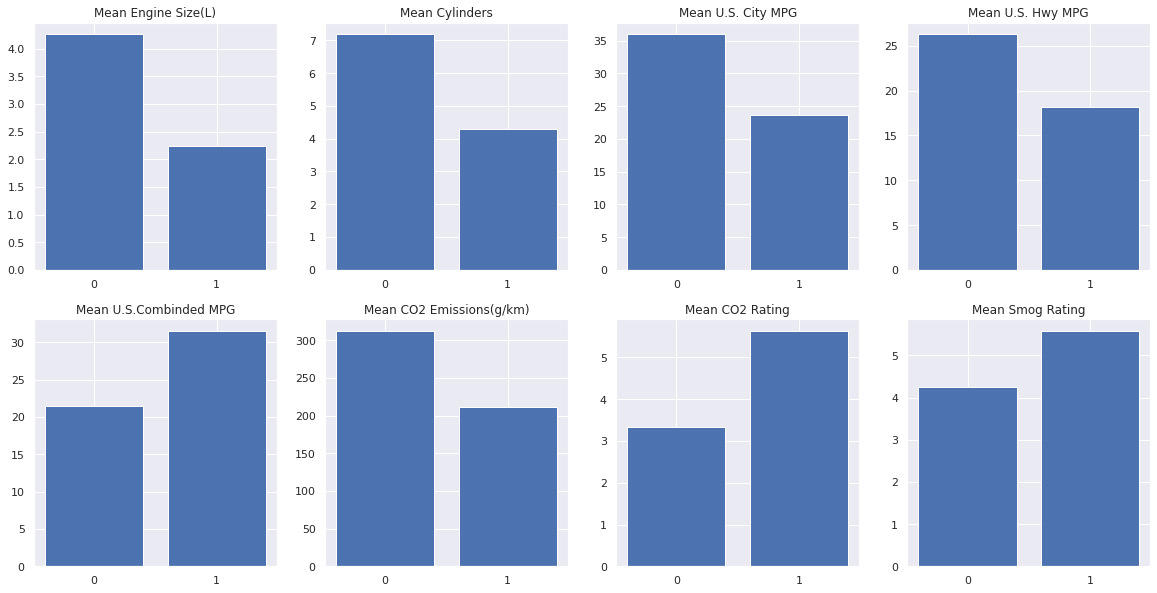

In [ ]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 2,4.  axes.ravel() will flatten it to 20,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].set_xticks([0,1])
  axes[i].set_title(f'Mean {col}')
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])

Cluster 0 = cluster zero is highest in the Mean engine size which attunes well with it being highest in the Mean number of cylinders, this bodes well with it being highest in C02 emmisions, a little surprising is the city and hwy are bother apart of this cluster but combined is in cluster 1

Cluster 1 = Cluster 1 has very little features it is Highest in but it has our target, Combined MPG and is scoring higher in CO2 Rating as well as Smog rating it is interesting that all 3 of these colums are also my highest correlation to target in the multi varite color map. 

Suggestion would be to continue to explore Cluster 1 as it has the highest correlation contributors as well as itself included. 